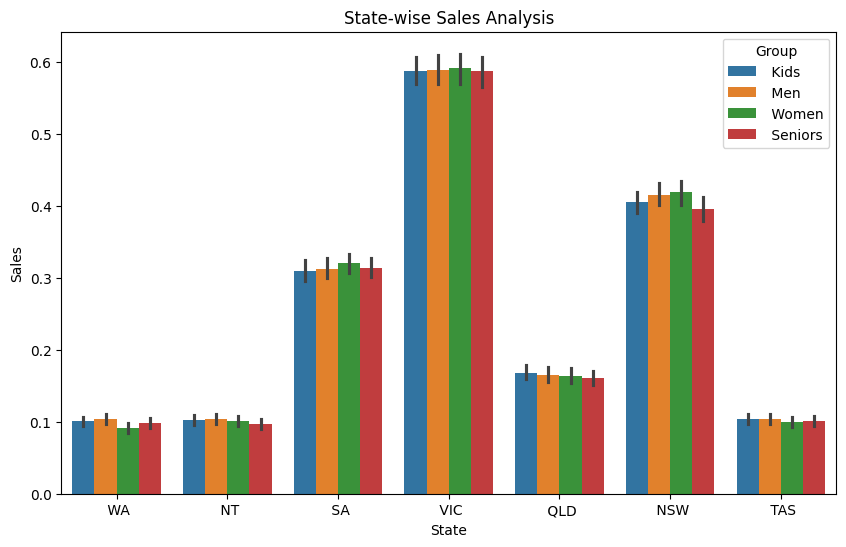

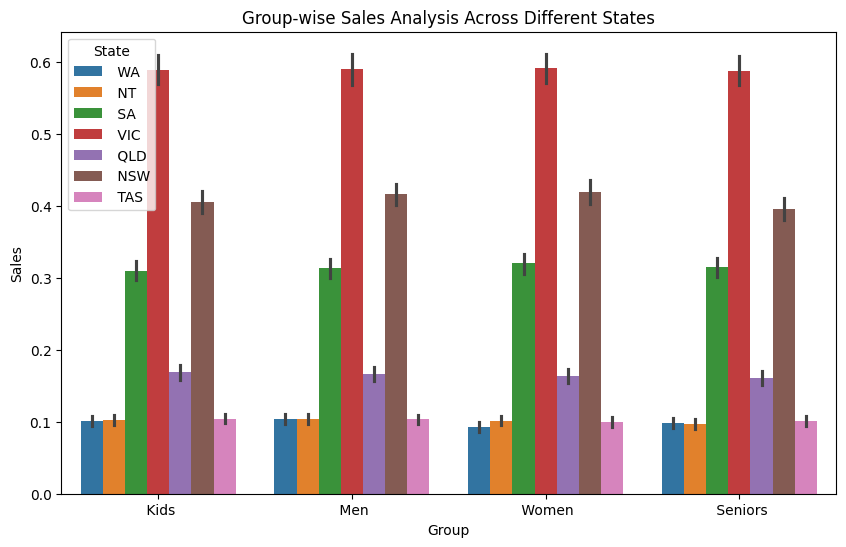

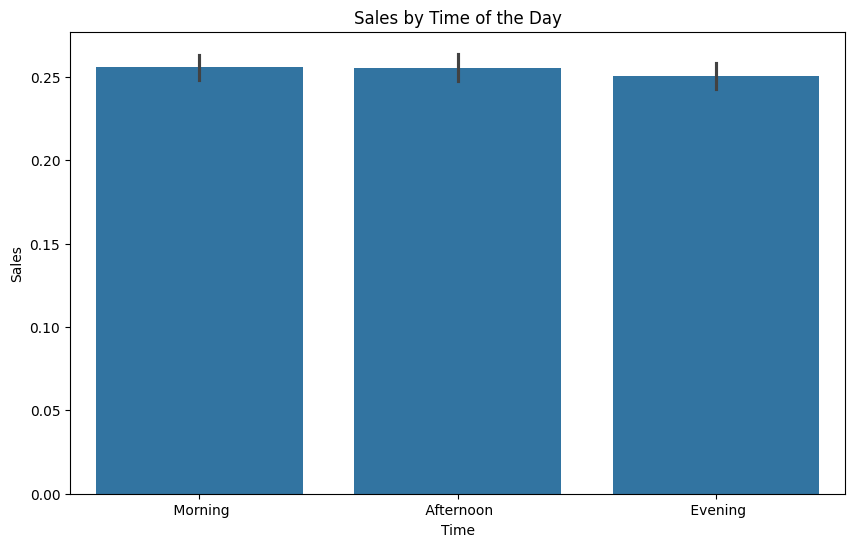

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Desktop/AusApparalSales4thQrt2020.csv')

# Data Wrangling
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Quarter'] = data['Date'].dt.quarter

# Normalize 'Unit' and 'Sales'
data['Unit'] = (data['Unit'] - data['Unit'].min()) / (data['Unit'].max() - data['Unit'].min())
data['Sales'] = (data['Sales'] - data['Sales'].min()) / (data['Sales'].max() - data['Sales'].min())

# Data Analysis
# Group-wise and State-wise analysis
group_sales = data.groupby('Group')['Sales'].sum()
state_sales = data.groupby('State')['Sales'].sum()

highest_generating_group = group_sales.idxmax()
lowest_generating_group = group_sales.idxmin()
highest_generating_state = state_sales.idxmax()
lowest_generating_state = state_sales.idxmin()

# Weekly, Monthly, and Quarterly Reports
weekly_sales_report = data.groupby('Week')['Sales'].sum().reset_index()
monthly_sales_report = data.groupby('Month')['Sales'].sum().reset_index()
quarterly_sales_report = data.groupby('Quarter')['Sales'].sum().reset_index()

# Data Visualization
# State-wise Sales Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=data)
plt.title('State-wise Sales Analysis')
plt.show()

# Group-wise Sales Analysis across Different States
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=data)
plt.title('Group-wise Sales Analysis Across Different States')
plt.show()

# Time-of-the-Day Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Sales', data=data)
plt.title('Sales by Time of the Day')
plt.show()
